# **EDA Analisis Serangan Cyber Berdasarkan Lalu Lintas Jaringan**

**Kelompok 7:**


1.   Sean Arthur Tamajaya || 5027251050
2.   Muhammad Atallah Mas'udi || 5027251071
3.   Muhammad Razzan Azizi Djauhari || 5027251086
4.   Muhammad Ridwan || 5027251113





**Link respiratory = https://github.com/minecraftsean321-ops/Statprob-Kel.-7.git**

**Link Dataset     = https://www.kaggle.com/datasets/dnkumars/cybersecurity-intrusion-detection-dataset**

# **Persiapan**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)

In [ ]:
# import requirements library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load dataset
data = pd.read_csv("/content/cybersecurity_intrusion_data.csv")

# **Deskirpsi Dataset**

In [ ]:
# melihat sekilas data 5 row pertama
data.head()


,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [ ]:
# get the shape of the dataset
baris, kolom = data.shape
print("baris:", baris)
print("kolom:", kolom)

baris: 9537
kolom: 11


In [ ]:
# get info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [ ]:
# get statistical summary
data.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [ ]:
# Mengekstrak variabel numerik dari URL

# Panjang total URL
data['url_length'] = data['session_id'].str.len()

# Panjang domain (hostname)
from urllib.parse import urlparse
data['domain_length'] = data['session_id'].apply(lambda x: len(urlparse(x).netloc))

# Panjang path (setelah domain)
data['path_length'] = data['session_id'].apply(lambda x: len(urlparse(x).path))

# Jumlah parameter query (?key=value&...)
data['num_params'] = data['session_id'].apply(lambda x: urlparse(x).query.count('&') + (1 if urlparse(x).query else 0))

# Jumlah titik (.)
data['num_dots'] = data['session_id'].str.count(r'\.')

# Jumlah dash (-)
data['num_hyphens'] = data['session_id'].str.count(r'-')

# Jumlah angka (0–9)
data['num_digits'] = data['session_id'].str.count(r'\d')

# Ada https atau tidak
data['is_https'] = data['session_id'].apply(lambda x: 1 if urlparse(x).scheme == "https" else 0)

data.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected,url_length,domain_length,path_length,num_params,num_dots,num_hyphens,num_digits,is_https
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1,9,0,9,0,0,0,5,0
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0,9,0,9,0,0,0,5,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1,9,0,9,0,0,0,5,0
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1,9,0,9,0,0,0,5,0
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0,9,0,9,0,0,0,5,0


In [ ]:
# Mengubah type kategori ke label angka
mapping = {"benign": 0, "phishing": 1, "defacement": 2, "malware": 3}
data["attack_detected_encoded"] = data["attack_detected"].map(mapping)
data.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected,url_length,domain_length,path_length,num_params,num_dots,num_hyphens,num_digits,is_https,attack_detected_encoded
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1,9,0,9,0,0,0,5,0,NaN
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0,9,0,9,0,0,0,5,0,NaN
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1,9,0,9,0,0,0,5,0,NaN
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1,9,0,9,0,0,0,5,0,NaN
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0,9,0,9,0,0,0,5,0,NaN


In [ ]:
# Check unique values in 'attack_detected' to identify actual categories
print(data['attack_detected'].unique())

[1 0]


In [ ]:
# get new info of the dataset
data.info()

# get statistical summary
data.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   session_id               9537 non-null   object 
 1   network_packet_size      9537 non-null   int64  
 2   protocol_type            9537 non-null   object 
 3   login_attempts           9537 non-null   int64  
 4   session_duration         9537 non-null   float64
 5   encryption_used          7571 non-null   object 
 6   ip_reputation_score      9537 non-null   float64
 7   failed_logins            9537 non-null   int64  
 8   browser_type             9537 non-null   object 
 9   unusual_time_access      9537 non-null   int64  
 10  attack_detected          9537 non-null   int64  
 11  url_length               9537 non-null   int64  
 12  domain_length            9537 non-null   int64  
 13  path_length              9537 non-null   int64  
 14  num_params              

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,url_length,domain_length,path_length,num_params,num_dots,num_hyphens,num_digits,is_https,attack_detected_encoded
count,9537.00,9537.00,9537.00,9537.00,9537.00,9537.00,9537.00,9537.0,9537.0,9537.0,9537.0,9537.0,9537.0,9537.0,9537.0,0.0
mean,500.43,4.03,792.75,0.33,1.52,0.15,0.45,9.0,0.0,9.0,0.0,0.0,0.0,5.0,0.0,NaN
std,198.38,1.96,786.56,0.18,1.03,0.36,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
min,64.00,1.00,0.50,0.00,0.00,0.00,0.00,9.0,0.0,9.0,0.0,0.0,0.0,5.0,0.0,NaN
25%,365.00,3.00,231.95,0.19,1.00,0.00,0.00,9.0,0.0,9.0,0.0,0.0,0.0,5.0,0.0,NaN
50%,499.00,4.00,556.28,0.31,1.00,0.00,0.00,9.0,0.0,9.0,0.0,0.0,0.0,5.0,0.0,NaN
75%,635.00,5.00,1105.38,0.45,2.00,0.00,1.00,9.0,0.0,9.0,0.0,0.0,0.0,5.0,0.0,NaN
max,1285.00,13.00,7190.39,0.92,5.00,1.00,1.00,9.0,0.0,9.0,0.0,0.0,0.0,5.0,0.0,NaN


In [ ]:
# checking missing values
data.isnull().sum()

,0
session_id,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,1966
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0


In [ ]:
# total baris duplikat
print("Total duplicate rows:", data.duplicated().sum())

Total duplicate rows: 0


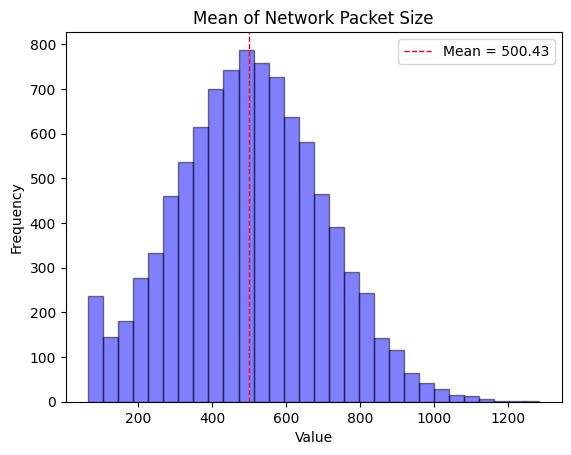

In [ ]:
# mean
# Create a histogram
plt.hist(data["network_packet_size"], bins=30, edgecolor='black', alpha=0.5, color='blue')

# Add a vertical line at the mean
mean_value = data["network_packet_size"].mean()
plt.axvline(x=mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean_value:.2f}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Mean of Network Packet Size')

# Add legend
plt.legend()

# Show the plot
plt.show()

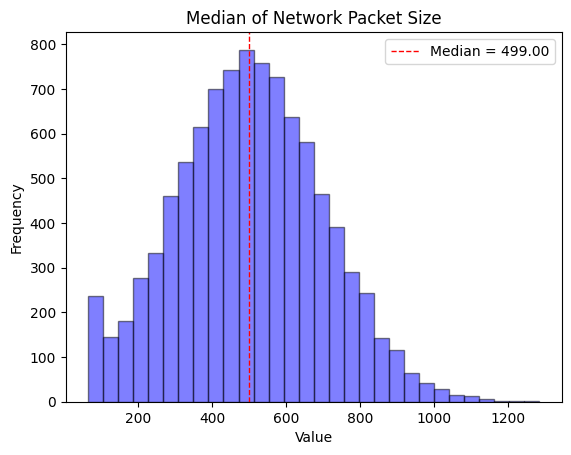

In [ ]:
# median
# Create a histogram
plt.hist(data["network_packet_size"], bins=30, edgecolor='black', alpha=0.5, color='blue')

# Add a vertical line at the median
median_val = data["network_packet_size"].median()
plt.axvline(x=median_val, color='red', linestyle='dashed', linewidth=1, label=f'Median = {median_val:.2f}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Median of Network Packet Size')

# Add legend
plt.legend()

# Show the plot
plt.show()

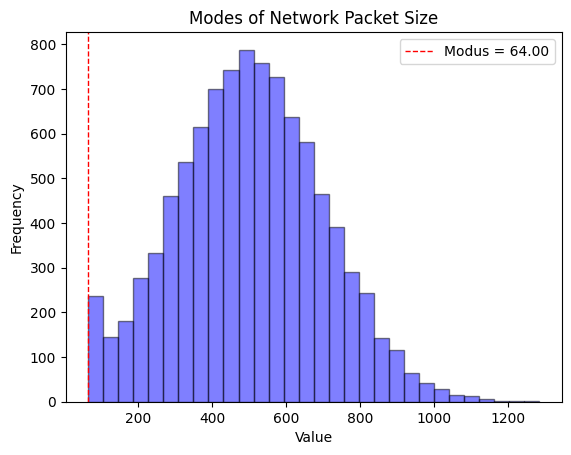

In [ ]:
# modus
# Create a histogram
plt.hist(data["network_packet_size"], bins=30, edgecolor='black', alpha=0.5, color='blue')

# Add vertical lines at the modes
modes_val = data["network_packet_size"].mode()
for i in range(len(modes_val)):
    plt.axvline(x=modes_val[i], color='red', linestyle='dashed', linewidth=1, label=f'Modus = {modes_val[i]:.2f}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Modes of Network Packet Size')

# Add legend
plt.legend()

# Show the plot
plt.show()

# **Analisis Missing Values & Outlier**

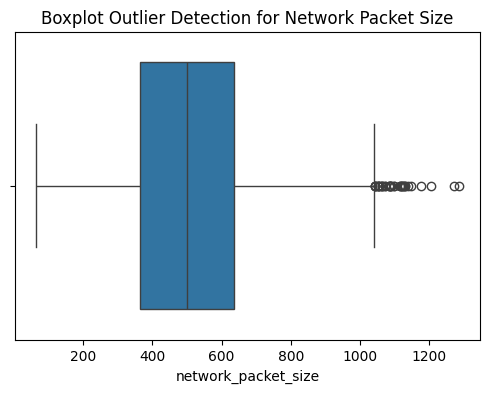

In [ ]:
# Boxplot for outlier detection
plt.figure(figsize=(6,4))
sns.boxplot(x=data["network_packet_size"])
plt.title("Boxplot Outlier Detection for Network Packet Size")
plt.show()

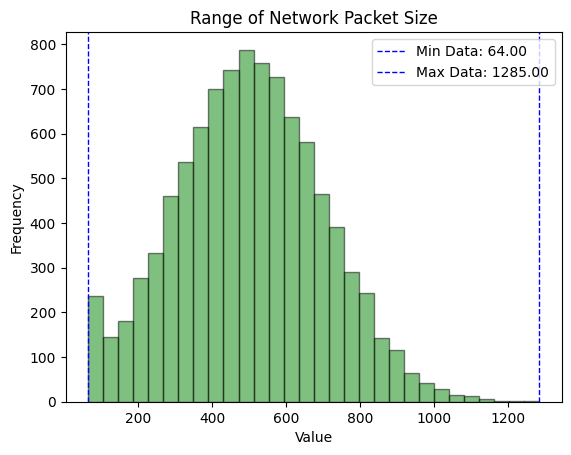

In [ ]:
# visualize range
# Create a histogram
plt.hist(data["network_packet_size"], bins=30, edgecolor='black', alpha=0.5, color='green')

# Add vertical lines for min and max
plt.axvline(x=min(data["network_packet_size"]), color='blue', linestyle='dashed', linewidth=1, label=f'Min Data: {min(data["network_packet_size"]):.2f}')
plt.axvline(x=max(data["network_packet_size"]), color='blue', linestyle='dashed', linewidth=1, label=f'Max Data: {max(data["network_packet_size"]):.2f}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Range of Network Packet Size')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Outlier Mean and Std Method
mean = data["network_packet_size"].mean()
std = data["network_packet_size"].std()

upper_limit = mean + 2*std
lower_limit = mean - 2*std

print(f"Mean: {mean:.2f}, Std: {std:.2f}")
print(f"Upper limit: {upper_limit:.2f}, Lower limit: {lower_limit:.2f}")

outliers = data[(data["network_packet_size"] > upper_limit) | (data["network_packet_size"] < lower_limit)]

print("\nNormal:")
print(len(data) - len(outliers))

print("\nOutliers (Mean ± 2*Std):")
print(len(outliers))

Mean: 500.43, Std: 198.38
Upper limit: 897.19, Lower limit: 103.67

Normal:
9074

Outliers (Mean ± 2*Std):
463


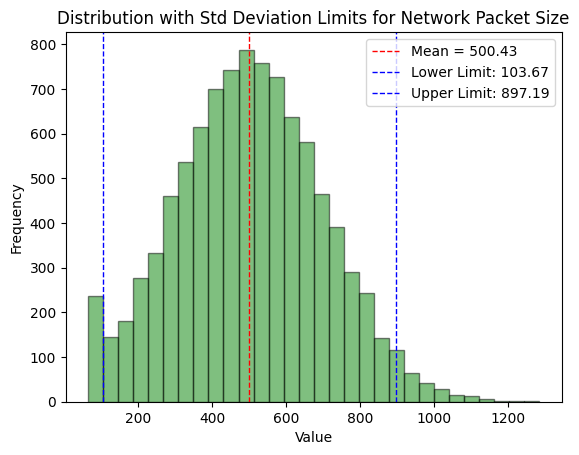

In [ ]:
# Create a histogram
plt.hist(data["network_packet_size"], bins=30, edgecolor='black', alpha=0.5, color='green')

# Add vertical lines for mean and std deviation limits
mean = data["network_packet_size"].mean()
std = data["network_packet_size"].std()
upper_limit = mean + 2*std
lower_limit = mean - 2*std


plt.axvline(x=mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean:.2f}')
plt.axvline(x=lower_limit, color='blue', linestyle='dashed', linewidth=1, label=f'Lower Limit: {lower_limit:.2f}')
plt.axvline(x=upper_limit, color='blue', linestyle='dashed', linewidth=1, label=f'Upper Limit: {upper_limit:.2f}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Distribution with Std Deviation Limits for Network Packet Size')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Outlier IQR Method
Q1 = data["network_packet_size"].quantile(0.25)
Q2 = data["network_packet_size"].quantile(0.5)
Q3 = data["network_packet_size"].quantile(0.75)
print("Q1:", Q1)
print("Q3:", Q3)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

outliers_iqr = data[(data["network_packet_size"] < lower_bound) | (data["network_packet_size"] > upper_bound)]

print("\nNormal:")
print(len(data) - len(outliers_iqr))

print("\nOutliers (IQR):")
print(len(outliers_iqr))

Q1: 365.0
Q3: 635.0
Lower Bound: -40.0
Upper Bound: 1040.0

Normal:
9500

Outliers (IQR):
37


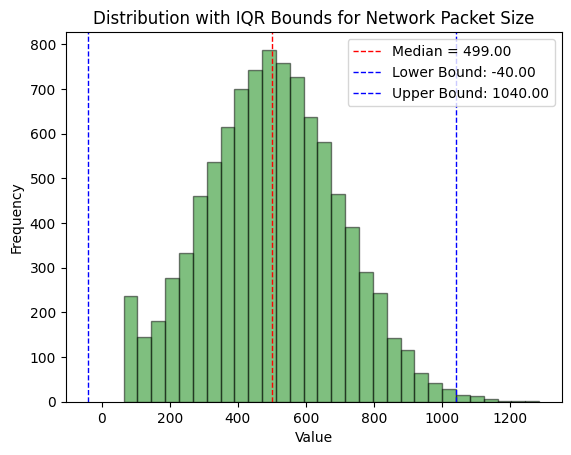

In [ ]:
# Create a histogram
plt.hist(data["network_packet_size"], bins=30, edgecolor='black', alpha=0.5, color='green')

# Add vertical lines for median and IQR bounds
Q1 = data["network_packet_size"].quantile(0.25)
Q2 = data["network_packet_size"].quantile(0.5)
Q3 = data["network_packet_size"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.axvline(x=Q2, color='red', linestyle='dashed', linewidth=1, label=f'Median = {Q2:.2f}')
plt.axvline(x=lower_bound, color='blue', linestyle='dashed', linewidth=1, label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(x=upper_bound, color='blue', linestyle='dashed', linewidth=1, label=f'Upper Bound: {upper_bound:.2f}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Distribution with IQR Bounds for Network Packet Size')

# Add legend
plt.legend()

# Show the plot
plt.show()

# **Univariate Analysis**

In [ ]:
# checking balance label
data.value_counts("browser_type")

,count
browser_type,
Chrome,5137
Firefox,1944
Edge,1469
Unknown,502
Safari,485


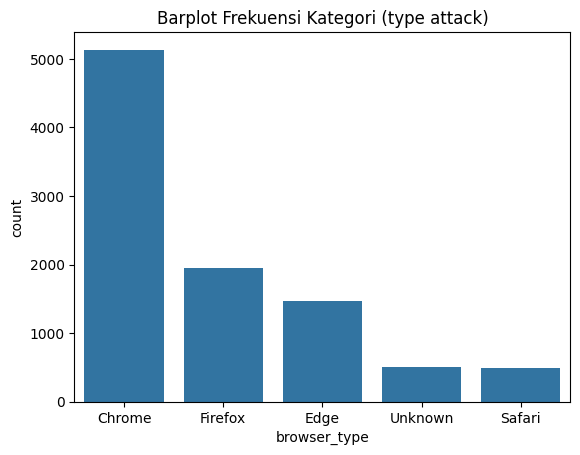

In [ ]:
# visualize each label
freq = data["browser_type"].value_counts().sort_values(ascending=False)
sns.countplot(x="browser_type", data=data, order=freq.index)
plt.title("Barplot Frekuensi Kategori (type attack)")
plt.show()

In [ ]:
import math

# 1. Menentukan banyak data
n = data["network_packet_size"].count()
print("1. n =", n)

# 2. Membuat histogram secara manual untuk kolom network_packet_size
d_min = data["network_packet_size"].min()
d_max = data["network_packet_size"].max()
print("2. Dmin =", d_min, ", Dmax =", d_max)

# 3. Menghitung rentang data
R = d_max - d_min
print("3. R =", R)

# 4. Menentukan banyak kelas
k = math.ceil(1 + 3.3 * math.log(n, 10))
print("4. Banyak kelas =", k)

# 5. Menghitung panjang interval kelas
I = math.ceil(R / k)
print("5. Panjang interval kelas =", I)

# 6. Menghitung interval kelas dan tepi kelas
kelas = []
interval_kelas = []
tepi_kelas = [] # hanya ambil BAK - 0,5
for i in range(k):
    BAK = d_min + i * I
    BBK = BAK + I
    tepi = BAK - 0.5
    kelas.append(i + 1)
    interval_kelas.append(str(BAK) + "-" + str(BBK))
    tepi_kelas.append(tepi)
tepi_kelas.append(BBK + 0.5)
print("6. Kelas =", kelas)
print("6. Interval kelas =", interval_kelas)
print("6. Tepi kelas =", tepi_kelas)


# 7. Menghitung frekuensi tiap kelas

# Convert data into a pandas DataFrame
df = data.copy()

# Create frequency distribution using pd.cut and value_counts
df["range"] = pd.cut(df["network_packet_size"], bins=tepi_kelas, labels=interval_kelas, include_lowest=True)
frequency_table = df["range"].value_counts().sort_index()
relative_frequency = frequency_table / frequency_table.sum() * 100

# Convert to DataFrame for a cleaner look
frequency_distribution = pd.DataFrame(
    {
        "Kelas": kelas,
        "Range": frequency_table.index,
        "Frequency": frequency_table.values,
        "Relative Frequency (%)": relative_frequency,
    }
)
frequency_distribution.reset_index(drop=True, inplace=True)

# Display the frequency distribution table
print("\nTable of Frequency Distribution")
print(frequency_distribution)

1. n = 9537
2. Dmin = 64 , Dmax = 1285
3. R = 1221
4. Banyak kelas = 15
5. Panjang interval kelas = 82
6. Kelas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
6. Interval kelas = ['64-146', '146-228', '228-310', '310-392', '392-474', '474-556', '556-638', '638-720', '720-802', '802-884', '884-966', '966-1048', '1048-1130', '1130-1212', '1212-1294']
6. Tepi kelas = [63.5, 145.5, 227.5, 309.5, 391.5, 473.5, 555.5, 637.5, 719.5, 801.5, 883.5, 965.5, 1047.5, 1129.5, 1211.5, 1294.5]

Table of Frequency Distribution
    Kelas      Range  Frequency  Relative Frequency (%)
0       1     64-146        381                3.994967
1       2    146-228        463                4.854776
2       3    228-310        799                8.377897
3       4    310-392       1172               12.288980
4       5    392-474       1461               15.319283
5       6    474-556       1543               16.179092
6       7    556-638       1384               14.511901
7       8    638-720       10

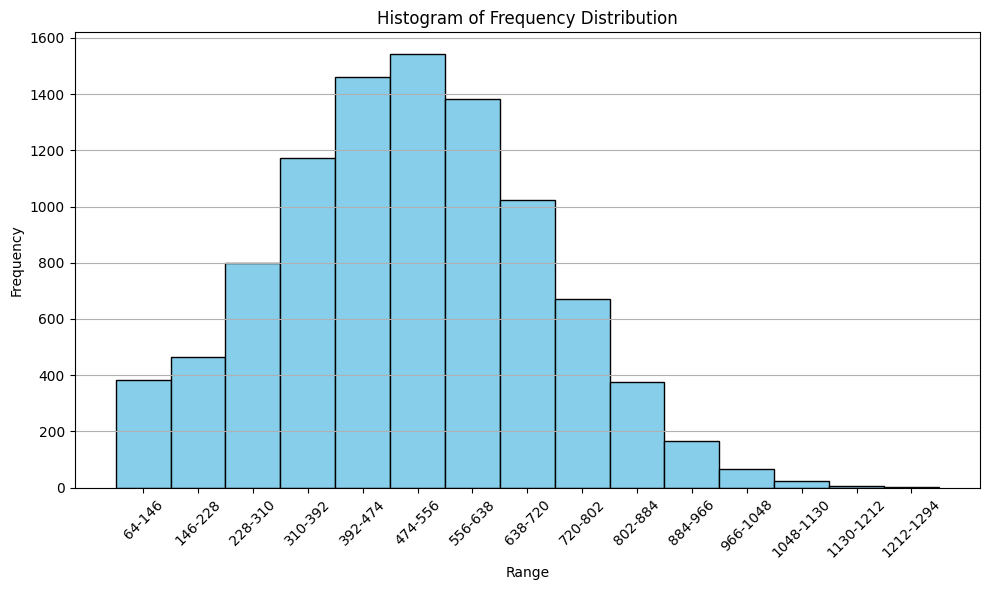

In [ ]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(
    frequency_distribution["Range"],
    frequency_distribution["Frequency"],
    width=1,
    edgecolor="black",
    color="skyblue",
)
plt.title("Histogram of Frequency Distribution")
plt.xlabel("Range")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis="y")

# Show the plot
plt.tight_layout()
plt.show()

# **Bivariate Analysis**

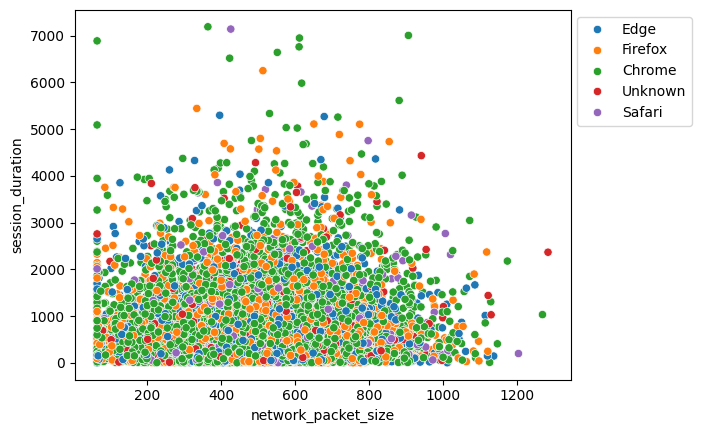

In [ ]:
sns.scatterplot(x='network_packet_size', y='session_duration',
                hue= 'browser_type', data=data, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

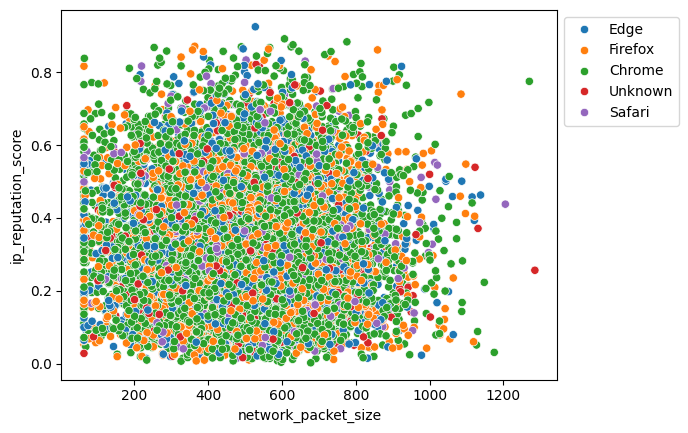

In [ ]:
sns.scatterplot(x='network_packet_size', y='ip_reputation_score',
                hue='browser_type', data=data, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

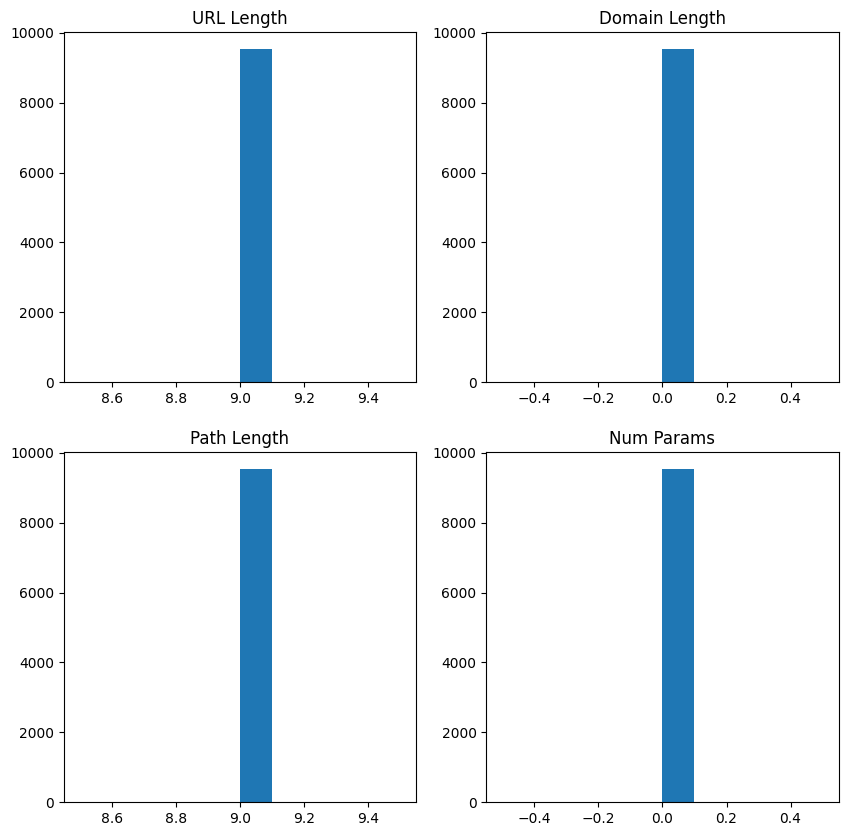

In [ ]:
# visualize using Histogram to see the distribution of data for each columns
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("URL Length")
axes[0,0].hist(data['url_length'], bins=10)

axes[0,1].set_title("Domain Length")
axes[0,1].hist(data['domain_length'], bins=10);

axes[1,0].set_title("Path Length")
axes[1,0].hist(data['path_length'], bins=10);

axes[1,1].set_title("Num Params")
axes[1,1].hist(data['num_params'], bins=10);

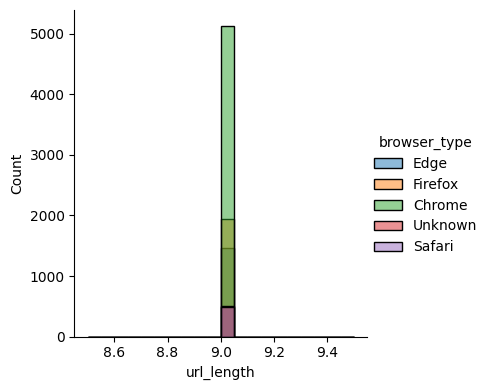

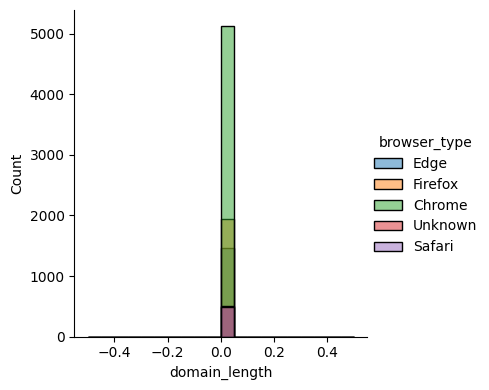

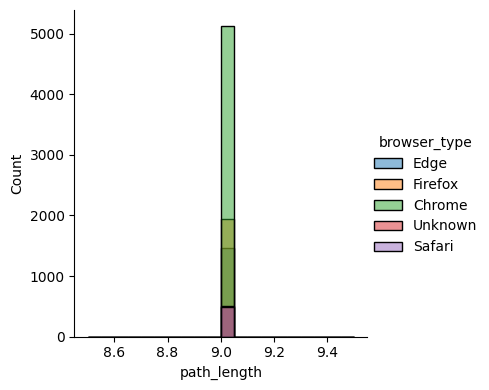

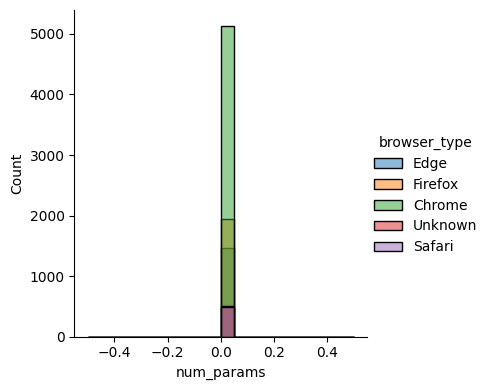

In [ ]:
# Histogram with Histplot
plot = sns.FacetGrid(data, hue="browser_type", height=4)
plot.map(sns.histplot, "url_length", kde=True, bins=20, alpha=0.5).add_legend()

plot = sns.FacetGrid(data, hue="browser_type", height=4)
plot.map(sns.histplot, "domain_length", kde=True, bins=20, alpha=0.5).add_legend()

plot = sns.FacetGrid(data, hue="browser_type", height=4)
plot.map(sns.histplot, "path_length", kde=True, bins=20, alpha=0.5).add_legend()

plot = sns.FacetGrid(data, hue="browser_type", height=4)
plot.map(sns.histplot, "num_params", kde=True, bins=20, alpha=0.5).add_legend()

plt.show()

# **Multivariate Analysis**

In [ ]:
# Checking correlation
# Drop non-numerical columns before calculating correlation
data_numerical = data.drop(["session_id", "protocol_type", "encryption_used", "browser_type"], axis=1)
correlation_matrix = data_numerical.corr(method='pearson').round(2)

# Display the correlation matrix
display(correlation_matrix)

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,url_length,domain_length,path_length,num_params,num_dots,num_hyphens,num_digits,is_https,attack_detected_encoded
network_packet_size,1.00,-0.00,0.02,0.00,-0.01,-0.00,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
login_attempts,-0.00,1.00,0.01,-0.00,-0.01,0.01,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
session_duration,0.02,0.01,1.00,-0.01,0.02,0.01,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip_reputation_score,0.00,-0.00,-0.01,1.00,0.02,-0.00,0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
failed_logins,-0.01,-0.01,0.02,0.02,1.00,0.01,0.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unusual_time_access,-0.00,0.01,0.01,-0.00,0.01,1.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attack_detected,-0.01,0.28,0.04,0.21,0.36,0.01,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
url_length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
domain_length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
path_length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


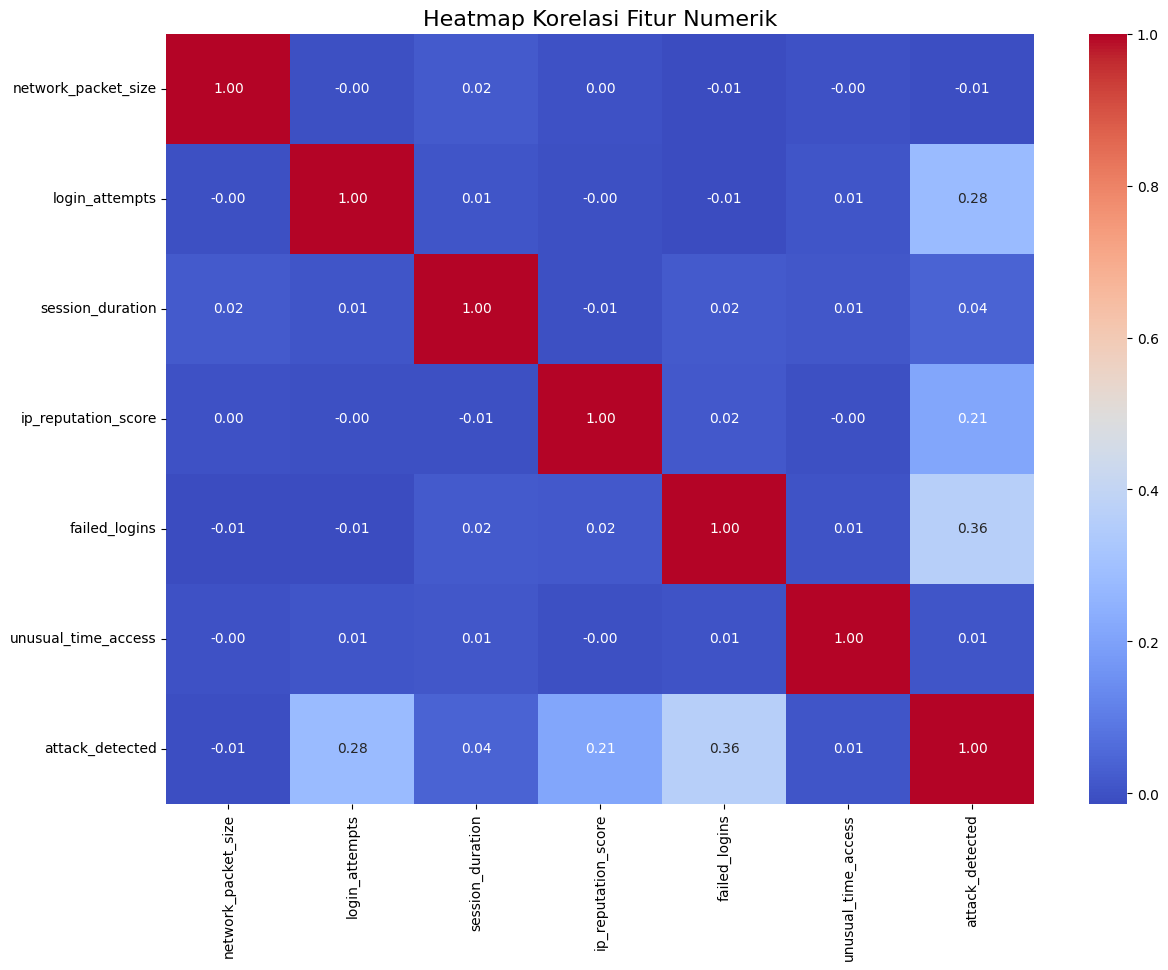

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "/content/cybersecurity_intrusion_data.csv"
df = pd.read_csv(file_path)

data_numerical = df.select_dtypes(include=['number'])

plt.figure(figsize=(14, 10))
sns.heatmap(data_numerical.corr(method='pearson'),
            annot=True,
            annot_kws={"size": 10},
            cmap='coolwarm',
            fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik', fontsize=16)
plt.show()

# **Korelasi Antar Fitur**
•	attack_detected ↔ failed_logins = 0.36: Hubungan positif lemah.  Peningkatan jumlah login yang gagal meningkatkan kemungkinan terdeteksinya serangan dengan lemah.

•	attack_detected ↔ login_attempts = 0.28: Hubungan positif lemah. Mirip dengan failed_logins, lebih banyak percobaan login juga berasosiasi lemah dengan deteksi serangan.


# **Korelasi Rendah**
•	attack_detected ↔ unusual_time_access = 0.01 : Hubungan positif sangat lemah. Yang berarti tidak memiliki hubungan linear yang jelas dengan apakah sebuah sesi merupakan serangan atau bukan.

•	failed_logins ↔ login_attempts = 0.01: korelasi positif sangat lemah. Tidak ada hubungan linear yang jelas.



#**Kesimpulan Hasil Analisis Data Cybersecurity Intrusion:**

Berdasarkan analisis eksploratori data cybersecurity intrusion ini, beberapa temuan kunci dan potensi masalah yang relevan untuk pemodelan prediktif telah teridentifikasi.

Temuan Utama:

Indikator Serangan Potensial: Variabel failed_logins dan login_attempts menunjukkan korelasi positif yang paling signifikan dengan variabel target attack_detected. Ini mengindikasikan bahwa frekuensi percobaan login yang gagal dan jumlah total percobaan login merupakan prediktor kuat terhadap kemungkinan terjadinya serangan.

Variabel dengan Dampak Rendah Terhadap Target: Variabel seperti network_packet_size dan session_duration menunjukkan korelasi yang sangat lemah atau mendekati nol dengan attack_detected, menunjukkan bahwa kurang informatif untuk membedakan antara sesi normal dan sesi serangan.

Potensi Masalah Data:

Missing Values: Kolom encryption_used memiliki proporsi missing values yang substansial (sekitar 20.6%), yang memerlukan strategi penanganan sebelum digunakan dalam analisis atau pemodelan.
Ketidakseimbangan Kelas: Distribusi kelas target attack_detected relatif seimbang (sekitar 44.7% serangan), namun perlu dipertimbangkan saat memilih metrik evaluasi model dan, jika diperlukan, menerapkan teknik penanganan ketidakseimbangan kelas.
Kesalahan Pemrosesan: Kolom attack_detected_encoded saat ini tidak berisi nilai yang valid (hanya NaN), yang mengindikasikan kesalahan dalam proses encoding yang perlu diperbaiki.

Implikasi untuk Pemodelan:

Variabel failed_logins, login_attempts, dan ip_reputation_score adalah kandidat fitur utama untuk pembangunan model deteksi serangan. Diperlukan langkah-langkah pra-pemrosesan data tambahan, termasuk penanganan missing values pada encryption_used dan koreksi pada kolom attack_detected_encoded. Evaluasi model sebaiknya menggunakan metrik yang sesuai untuk klasifikasi biner, dan pertimbangan dapat diberikan untuk teknik penanganan ketidakseimbangan kelas jika performa model awal memerlukannya.



